In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
'''

'\n'

In [2]:
df = pd.read_csv('thy.csv')

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [4]:
df.shape

(3772, 30)

In [5]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3772 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [7]:
for i in df.columns:
    df[i] = df[i].replace('?',np.NaN)

In [8]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [9]:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [10]:
df['sex']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3767    0.0
3768    0.0
3769    0.0
3770    1.0
3771    0.0
Name: sex, Length: 3772, dtype: float64

In [11]:

for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        

In [12]:
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'], axis = 1)

In [13]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

In [14]:
df['Class'].nunique()

4

In [15]:
df['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [16]:
df = pd.get_dummies(df, columns=['referral_source'])


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

In [19]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
3768,68.0,0.0,0,0,0,0,0,0,0,0,...,2.1,124,1.08,114,1,0,0,0,1,0
3769,74.0,0.0,0,0,0,0,0,0,0,0,...,1.8,112,1.07,105,1,0,0,0,0,1
3770,72.0,1.0,0,0,0,0,0,0,0,0,...,2,82,0.94,87,1,0,0,0,1,0


In [20]:
encode = LabelEncoder().fit(df['Class'])

In [21]:
import pickle

In [22]:

file = "enc.pickle"
pickle.dump(encode, open(file, "wb"))

In [23]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0


In [24]:
df.describe(include = "all")


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3003,3541,3385,3387,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,241,146,234,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,100,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,238,71,95,73,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,NaN,NaN,NaN,NaN,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,NaN,NaN,NaN,NaN,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [25]:
df.shape

(3772, 27)

In [26]:
from sklearn.impute import KNNImputer


In [27]:

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
# convert the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [28]:
new_df.isnull().sum()


age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

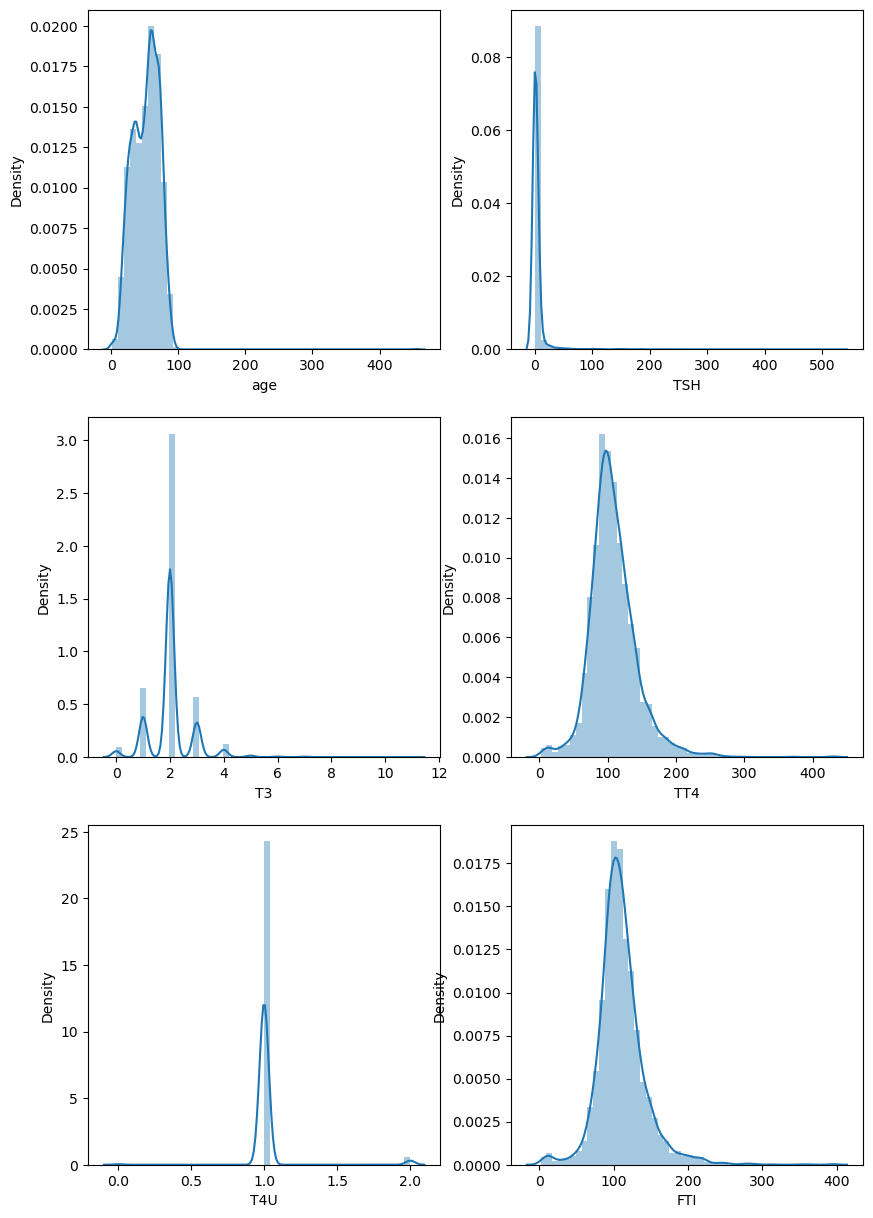

In [29]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


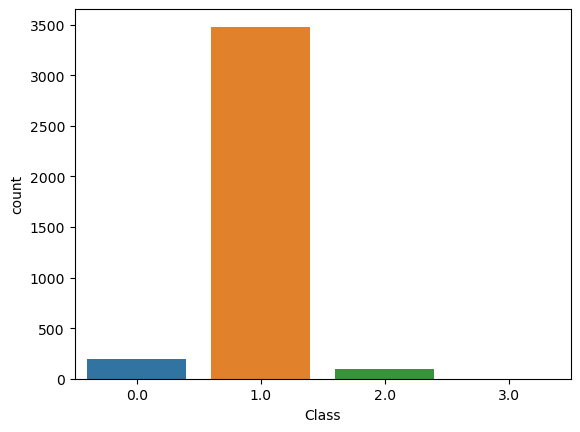

In [30]:

sns.countplot(new_df['Class'])
plt.show()
     

In [31]:

x = new_df.drop(['Class'],axis=1)
y = new_df['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_transform(x,y)

NameError: name 'RandomOverSampler' is not defined

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df['Class'].value_counts()

In [ ]:
df.describe()


In [ ]:
df.info()

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
'''
- Imputer takes 3 nearest neighbors and calculates - mean, median or mode of those values
- After that it replaces the NaN values with that value
- uniform weight ensures that the neighbors are given an equal weightage
'''

In [ ]:
new_array=imputer.fit_transform(df)

In [ ]:
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)


In [32]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [33]:
new_df.dtypes

age                          float64
sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                        float64
referral_source_STMW         float64
referral_source_SVHC         float64
referral_source_SVHD         float64
referral_source_SVI          float64
referral_source_other        float64
d

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

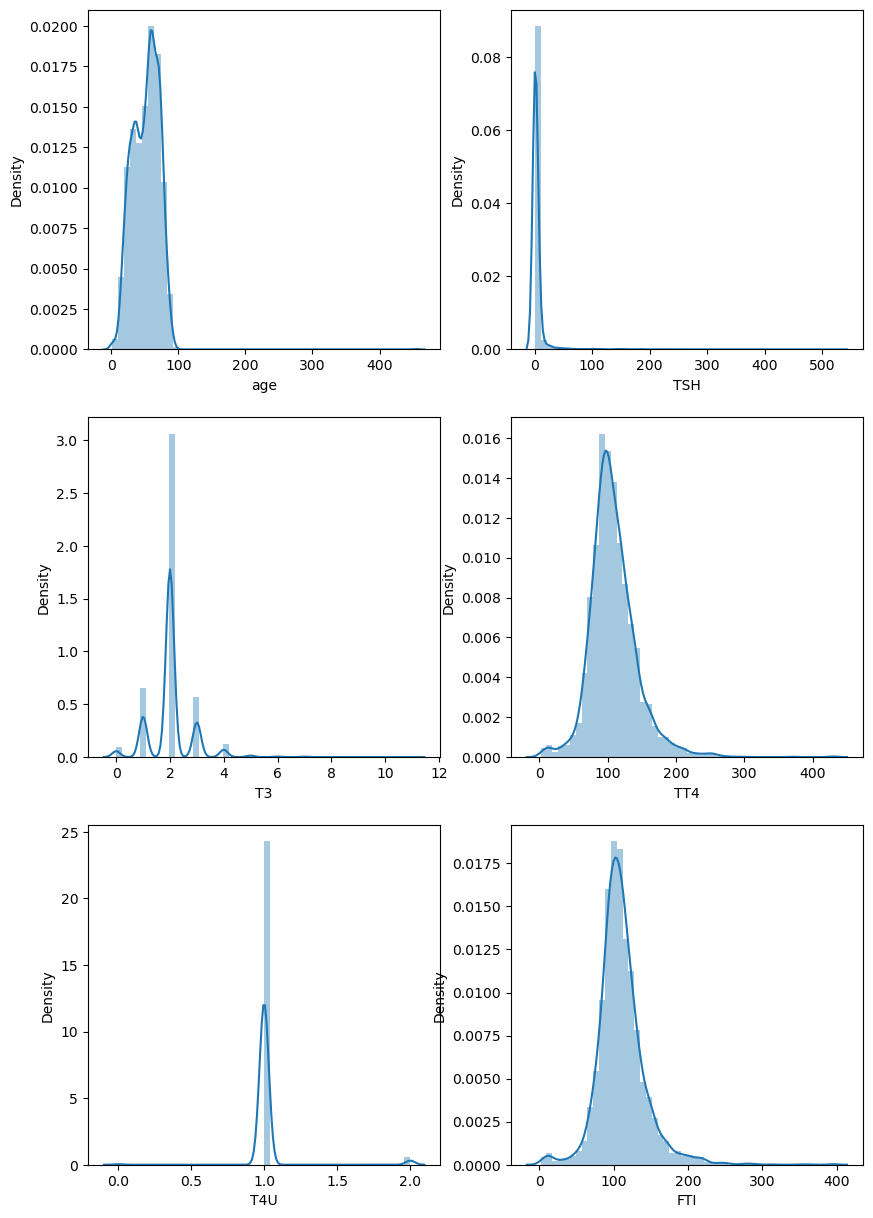

In [34]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

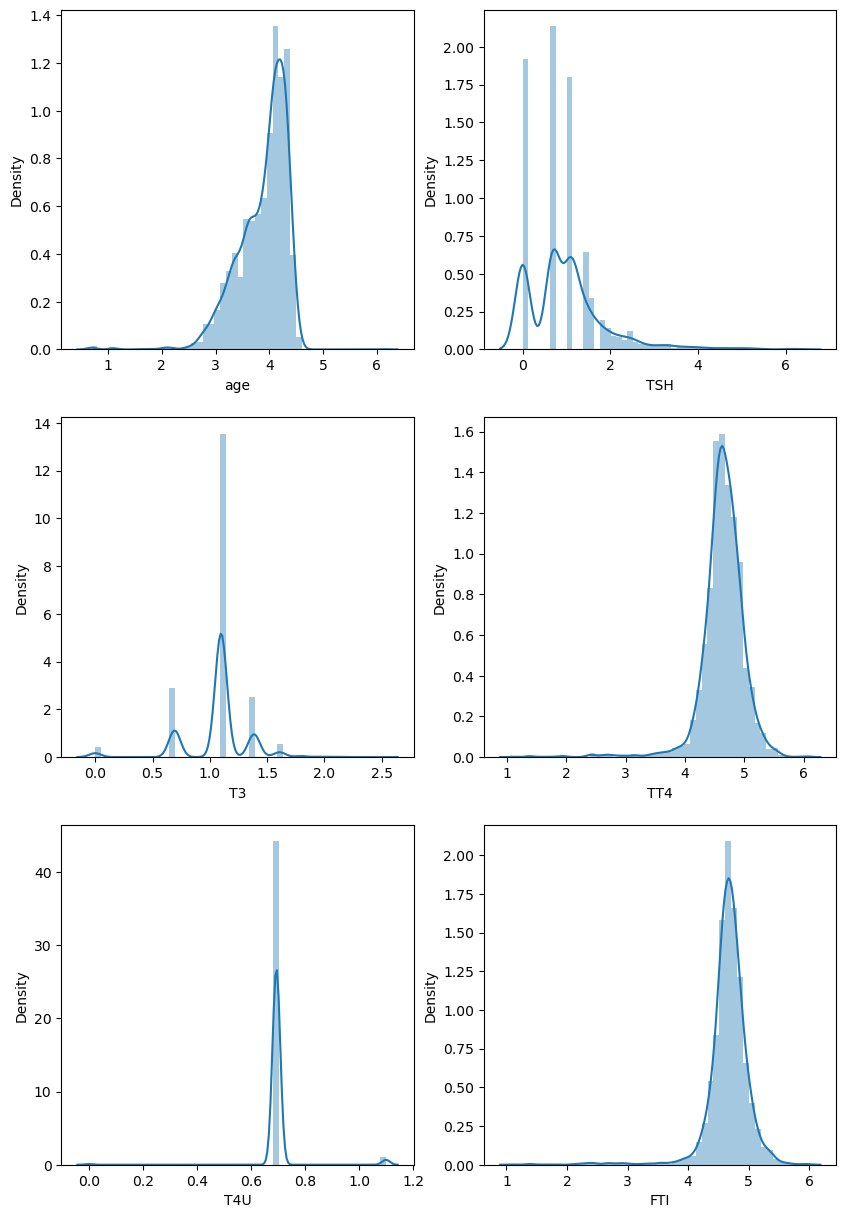

In [35]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

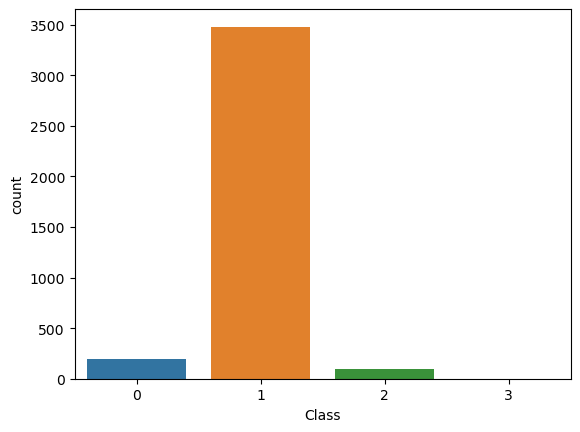

In [36]:
sns.countplot(df['Class'])

In [37]:
'''
The RandomOverSampler randomly selects samples from the minority class and duplicates them until 
the class distribution is balanced. This oversampling technique aims to increase the number of 
instances in the minority class, making it more comparable to the majority class.
'''

'\nThe RandomOverSampler randomly selects samples from the minority class and duplicates them until \nthe class distribution is balanced. This oversampling technique aims to increase the number of \ninstances in the minority class, making it more comparable to the majority class.\n'

In [38]:
from imblearn.over_sampling import RandomOverSampler


In [39]:


x = new_df.drop(['Class'],axis=1)
y = new_df['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)
     

In [40]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3767    1.0
3768    1.0
3769    1.0
3770    1.0
3771    1.0
Name: Class, Length: 3772, dtype: float64

In [41]:
x_sampled.shape

(13924, 26)

In [42]:
y_sampled.shape

(13924,)

In [43]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [44]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


In [45]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

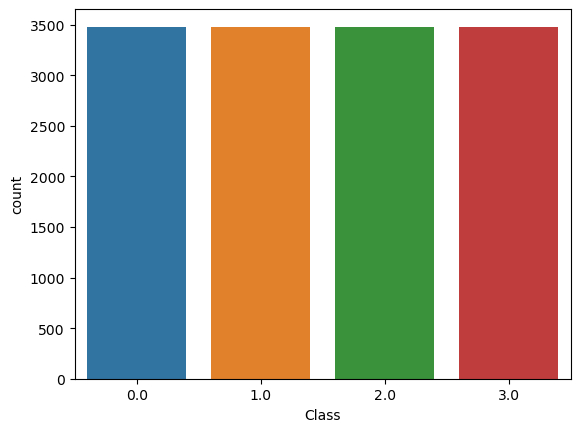

In [46]:
sns.countplot(y_sampled)

MODEL BUILDING

In [47]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
'''
1) Random Forest Classifier
2) KNeighborsClassifier
3) XGBClassifier
'''

'\n1) Random Forest Classifier\n2) KNeighborsClassifier\n3) XGBClassifier\n'

In [48]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0


In [49]:
x_sampled.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [50]:

def elbow_plot(data):
        """
                        Method Name: elbow_plot
                        Description: This method saves the plot to decide the optimum number of clusters to the file.
                        Output: A picture saved to the directory
                        On Failure: Raise Exception

        """
        
        wcss=[] # initializing an empty list
        try:
            for i in range (1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
                kmeans.fit(data) # fitting the data to the KMeans Algorithm
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')

            plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally
            # finding the value of the optimum cluster programmatically
            kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            print('The optimum number of clusters is: '+str(kn.knee)+' . Exited the elbow_plot method of the KMeansClustering class')
            return kn.knee

        except Exception as e:
          print(e)

In [51]:
elbow_plot(x_sampled)


name 'KMeans' is not defined


In [52]:
from sklearn.cluster import KMeans


In [53]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(x_sampled)


KMeans(n_clusters=3)

In [54]:
kmeans.fit(x_sampled)

KMeans(n_clusters=3)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled, y_sampled)

In [57]:
x_train.shape

(10443, 26)

In [58]:
x_test.shape

(3481, 26)

In [59]:
kmeans.fit(x_train,y_train)

KMeans(n_clusters=3)

In [60]:
y_pred = kmeans.predict(x_test)

In [61]:
y_pred

array([1, 2, 2, ..., 2, 1, 1])

In [62]:
accuracy_score(y_test,y_pred)

0.019247342717609882

In [63]:
kmeans = KMeans(n_clusters = 3)

In [64]:
kmeans.fit(x_train,y_train)

KMeans(n_clusters=3)

In [65]:
y_pred = kmeans.predict(x_test)

In [66]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


In [67]:
y_sampled

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13919    3.0
13920    3.0
13921    3.0
13922    3.0
13923    3.0
Name: Class, Length: 13924, dtype: float64

In [68]:
def elbow_plot(data):
        """
        -We construct an elbow plot to determine the no. of clusters needed
        -
        - 

        """
        
        wcss=[] # initializing an empty list
        try:
            for i in range (1,11):
                kmeans=KMeans(n_clusters=i, init = 'k-means++') # initializing the KMeans object
                kmeans.fit(data) # fitting the data to the KMeans Algorithm
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')

            plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally
            # finding the value of the optimum cluster programmatically
           

        except Exception as e:
          print(e)

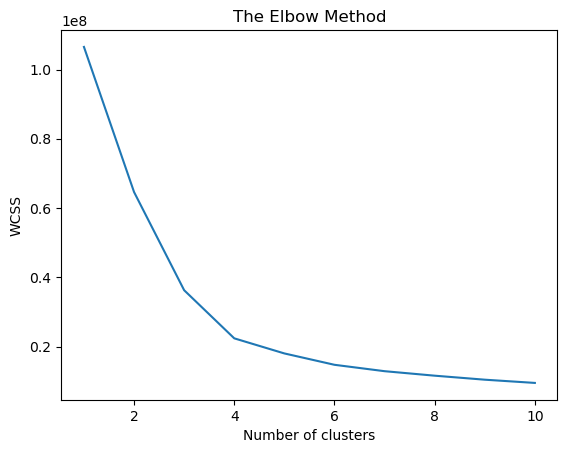

In [69]:
elbow_plot(x_sampled)

In [70]:
def create_clusters(data,number_of_clusters):
        """
                                Method Name: create_clusters
                                Description: Create a new dataframe consisting of the cluster information.
                                Output: A datframe with cluster column
                                On Failure: Raise Exception

      """
        
        try:
            kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
            
            y_kmeans=kmeans.fit_predict(data) #  divide data into clusters


            data['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
            print('succesfully created '+str(f"{number_of_clusters}")+ ' clusters. Exited the create_clusters method of the KMeansClustering class')
            return data

        except Exception as e:
          print(e)

In [71]:
create_clusters(x_sampled,3)

succesfully created 3 clusters. Exited the create_clusters method of the KMeansClustering class


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Cluster
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,1
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,1
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,1
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,1


In [72]:
x_sampled['Labels']=y_sampled


In [73]:
x_sampled.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Cluster,Labels
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1,1.0


In [74]:
new_df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,1.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,1.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,1.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,1.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,132.0,2.0,118.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,125.0,2.0,115.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,113.0,2.0,106.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,83.0,2.0,88.0,1.0,0.0,0.0,0.0,1.0,0.0


C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

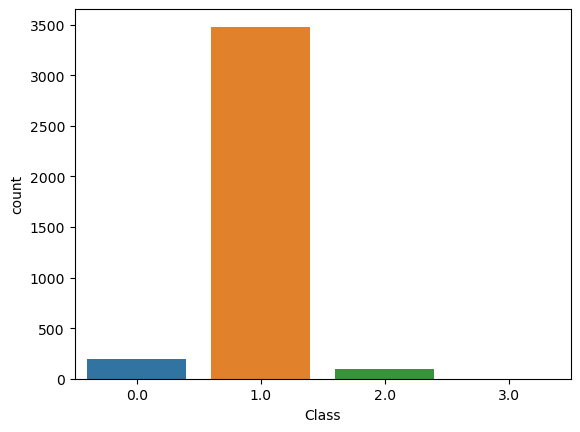

In [75]:
sns.countplot(new_df['Class'])

In [76]:
ros = RandomOverSampler(random_state=42)

In [77]:
x = new_df.drop(['Class'], axis = 1)

In [78]:
y = new_df['Class']

In [79]:
x_sampl, y_sampl = ros.fit_resample(x,y)

In [80]:
x_sampl.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [81]:
x_sampl.shape

(13924, 26)

In [82]:
x_sampl['new_class'] = y_sampl

In [83]:
x_sampl

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,new_class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0


In [84]:
y_sampl.shape

(13924,)

In [85]:
new_df2 = pd.DataFrame(data=x_sampl, columns = x_sampl.columns)

In [86]:
new_df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,new_class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0


In [87]:
'''
- we created a new dataset - new_df2
'''

'\n- we created a new dataset - new_df2\n'

In [88]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

In [89]:
new_df2.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
new_class                    0
dtype: int64

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_class', ylabel='count'>

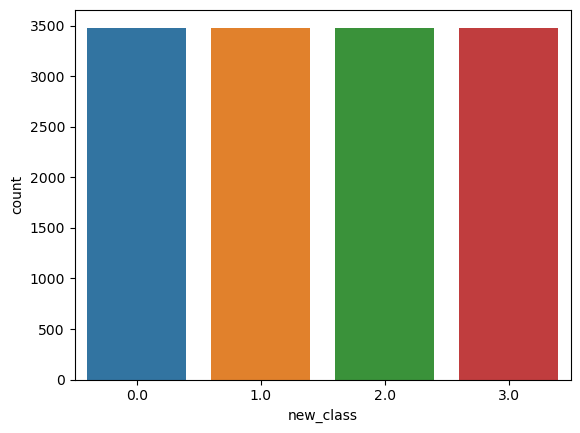

In [90]:
sns.countplot(new_df2['new_class'])

In [91]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [92]:


def elbow_plot(data):
        """
                        Method Name: elbow_plot
                        Description: This method saves the plot to decide the optimum number of clusters to the file.
                        Output: A picture saved to the directory
                        On Failure: Raise Exception

        """
        
        wcss=[] # initializing an empty list
        try:
            for i in range (1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
                kmeans.fit(data) # fitting the data to the KMeans Algorithm
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
        except Exception as e:
            print(e)

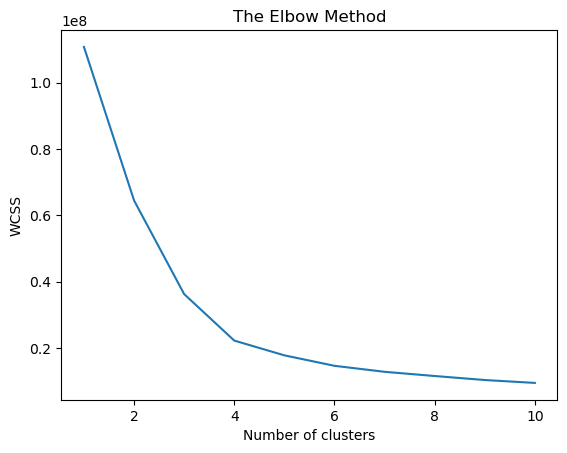

In [93]:
elbow_plot(new_df2)

In [94]:
kmeans = KMeans(n_clusters = 3)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

In [97]:
x = new_df2.iloc[:,0:26].values
y = new_df2.iloc[:,27:28]

In [98]:
y = new_df2.iloc[:,26:27].values

In [99]:
x.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [101]:
x_train

array([[38.,  0.,  0., ...,  0.,  0.,  1.],
       [56.,  1.,  0., ...,  0.,  0.,  1.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [74.,  1.,  0., ...,  0.,  0.,  1.],
       [42.,  1.,  0., ...,  0.,  0.,  1.],
       [51.,  1.,  0., ...,  0.,  0.,  1.]])

In [102]:
y_train

array([[0.],
       [2.],
       [0.],
       ...,
       [1.],
       [3.],
       [0.]])

In [103]:
kmeans = KMeans(n_clusters = 4)

In [104]:
kmeans.fit(x_train)

KMeans(n_clusters=4)

In [105]:
y_pred = kmeans.predict(x_test)

In [106]:
y_pred

array([2, 2, 2, ..., 0, 2, 2])

In [107]:
accuracy_score(y_test,y_pred)

0.3379607467687889

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [110]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [111]:
rf_classifier.fit(X_train, y_train)


C:\Users\LENOVO THINK PAD\AppData\Local\Temp\ipykernel_1940\1095801362.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [112]:
y_pred = rf_classifier.predict(X_test)


In [113]:
accuracy_score(y_test,y_pred)

0.9953321364452423

In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [115]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [116]:
new_df2['new_class'].nunique()

4

In [117]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)


In [118]:
xgb_classifier.fit(xx_train, yy_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [119]:
y_pred = xgb_classifier.predict(xx_test)


In [120]:
accuracy_score(y_test,y_pred)

0.9967684021543985

In [121]:
l = [[49.0,0.0, 1.0, 0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,64.0,2.0,60.0,0.0,0.0,0.0,0.0,1.0]]


In [122]:
l0 = np.array(l)

In [123]:
x_test.shape

(4178, 26)

In [124]:
x_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
xgb_classifier.predict([[49.0,	0.0, 1.0, 0.0,	0.0,	0.0,	0.0,	0.0,	0.0,	1.0,	0.0,	0.0,	0.0,	0.0,	0.0,	0.0	,2.0,	64.0,	2.0,	60.0,	0.0,	0.0,	0.0,	0.0,	1.0]])


In [ ]:
pd.to_csv('new_df2.csv')

In [ ]:
df.to_csv('new_df2.csv', index=False)


In [ ]:
new_df2

In [125]:
new_df2.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
new_class                    0
dtype: int64

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

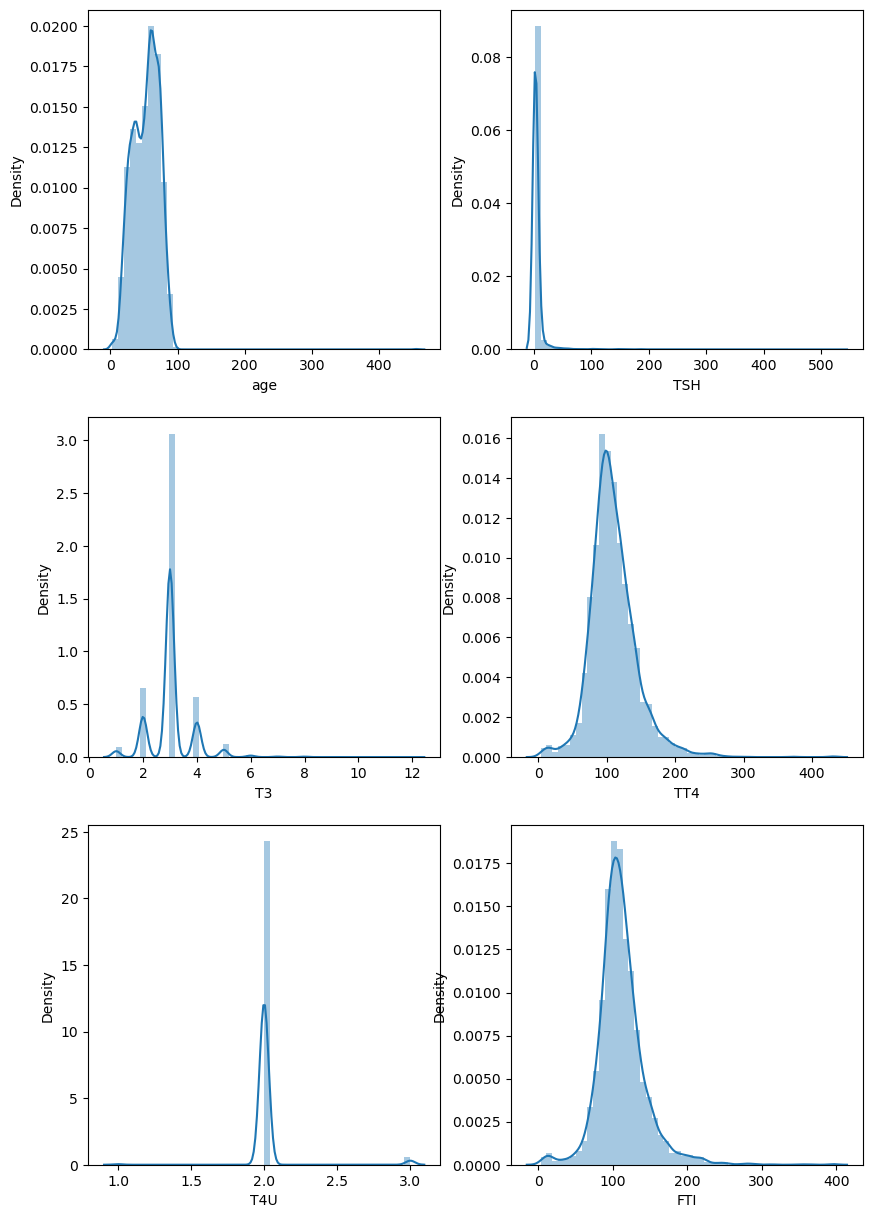

In [126]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
     

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_class', ylabel='count'>

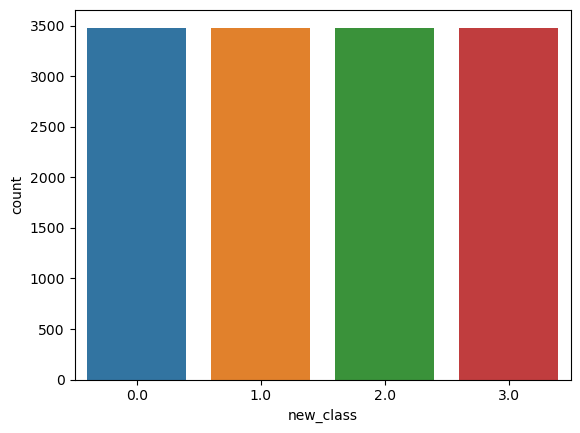

In [127]:
sns.countplot(new_df2['new_class'])

MODEL BUILDING FOR THE DATASET- NEW_DF2

In [128]:
new_df2.shape

(13924, 27)

In [129]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

In [130]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13924 entries, 0 to 13923
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13924 non-null  float64
 1   sex                        13924 non-null  float64
 2   on_thyroxine               13924 non-null  float64
 3   query_on_thyroxine         13924 non-null  float64
 4   on_antithyroid_medication  13924 non-null  float64
 5   sick                       13924 non-null  float64
 6   pregnant                   13924 non-null  float64
 7   thyroid_surgery            13924 non-null  float64
 8   I131_treatment             13924 non-null  float64
 9   query_hypothyroid          13924 non-null  float64
 10  query_hyperthyroid         13924 non-null  float64
 11  lithium                    13924 non-null  float64
 12  goitre                     13924 non-null  float64
 13  tumor                      13924 non-null  flo

In [131]:
new_df2.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,new_class
count,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,...,13924.000000,13924.000000,13924.000000,13924.00000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000
mean,50.345303,0.314278,0.055803,0.008259,0.004094,0.023700,0.003806,0.009408,0.013646,0.205257,...,2.592933,69.843220,2.013502,75.76027,0.021761,0.044025,0.006392,0.243680,0.684142,1.500000
std,17.189431,0.464244,0.229549,0.090507,0.063853,0.152119,0.061581,0.096542,0.116018,0.403904,...,0.810171,41.332274,0.123239,37.11032,0.145907,0.205157,0.079696,0.429317,0.464873,1.118074
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,36.000000,2.000000,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,67.000000,2.000000,66.50000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000
75%,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,99.000000,2.000000,102.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.250000
max,456.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,431.000000,3.000000,396.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [132]:
new_df2['new_class'].unique()

array([1., 0., 2., 3.])

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_class', ylabel='count'>

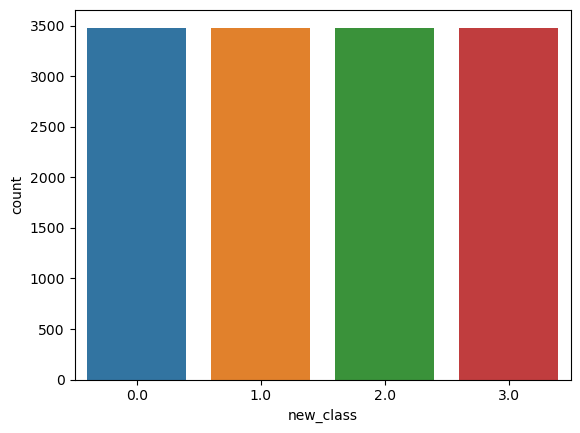

In [133]:
sns.countplot(new_df2['new_class'])

In [134]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [135]:
'''
-APPLYING KNN
'''

'\n-APPLYING KNN\n'

In [153]:
new_df2.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
new_class                    0
dtype: int64

In [154]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_class', ylabel='count'>

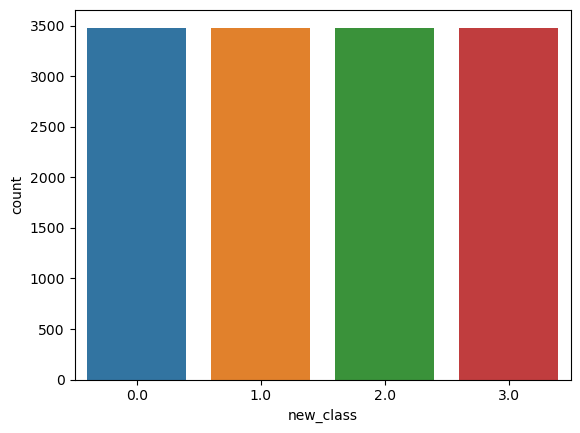

In [155]:
sns.countplot(new_df2['new_class'])

In [156]:
new_df2.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
new_class                    0
dtype: int64

In [141]:
new_df.dtypes

age                          float64
sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                        float64
referral_source_STMW         float64
referral_source_SVHC         float64
referral_source_SVHD         float64
referral_source_SVI          float64
referral_source_other        float64
d

In [157]:
new_df2['new_class'].nunique()

4

In [158]:
new_df2.shape

(13924, 27)

In [145]:
df = pd.read_csv('thy.csv')

In [146]:
df.shape

(3772, 30)

In [147]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [159]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

In [160]:
new_df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,new_class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0


C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

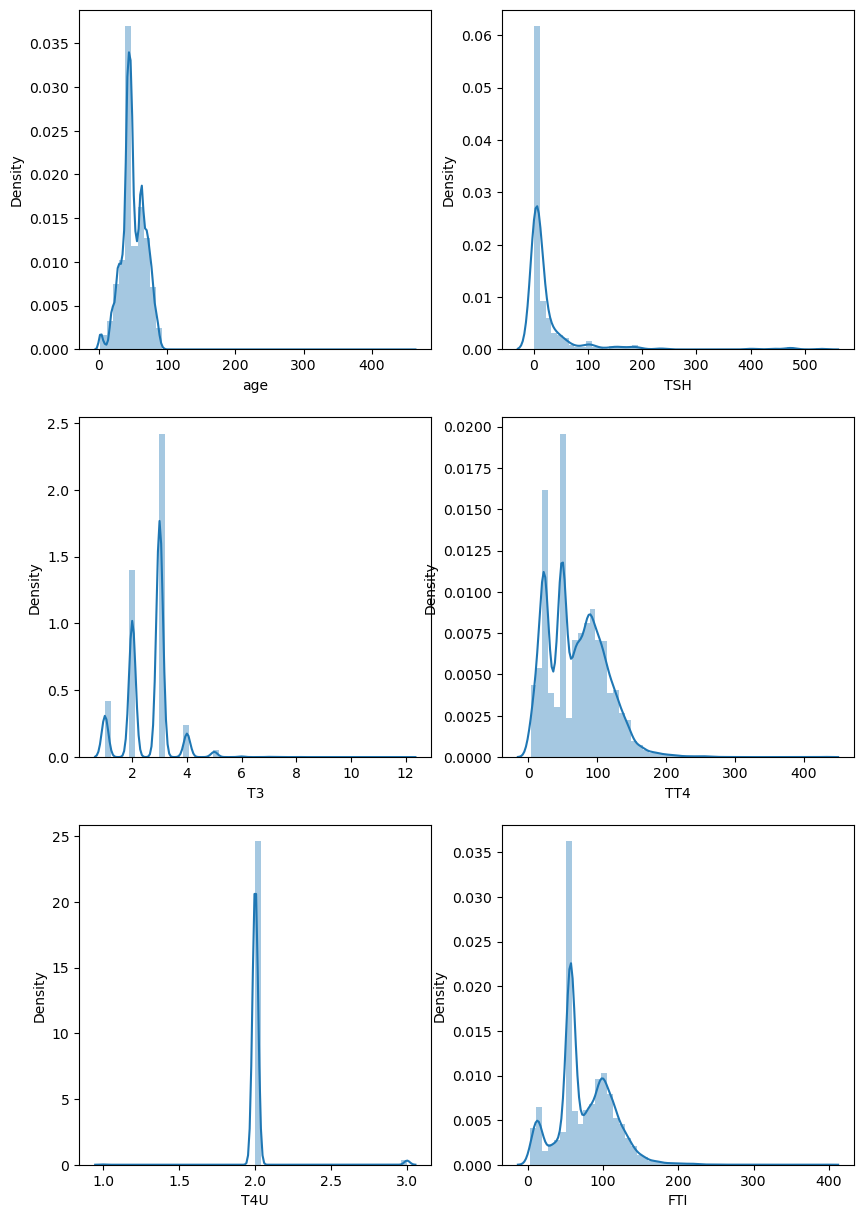

In [161]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df2[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
     

C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO THINK PAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

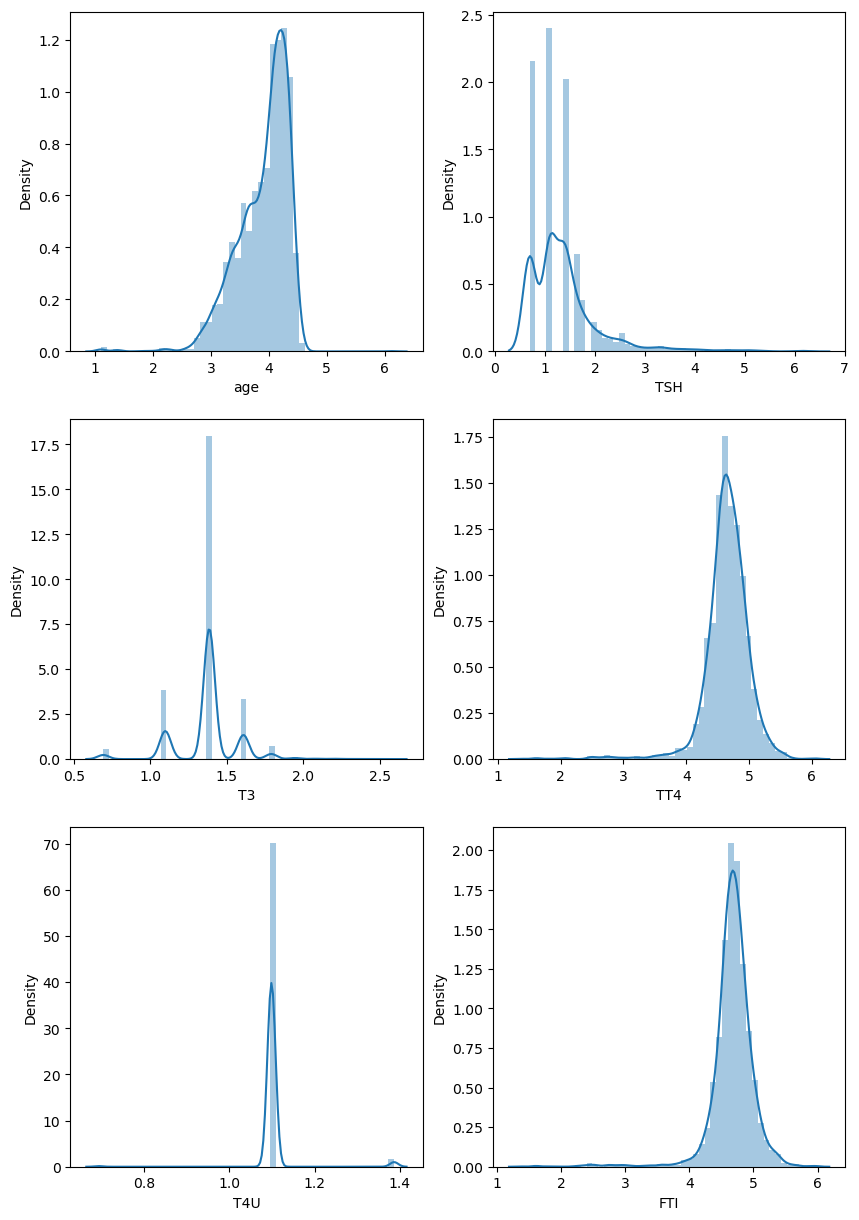

In [162]:

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
     

In [167]:


def elbow_plot(data):
        """
                        Method Name: elbow_plot
                        Description: This method saves the plot to decide the optimum number of clusters to the file.
                        Output: A picture saved to the directory
                        On Failure: Raise Exception

        """
        
        wcss=[] # initializing an empty list
        try:
            for i in range (1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
                kmeans.fit(data) # fitting the data to the KMeans Algorithm
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
        except Exception as e:
            print(e)
        

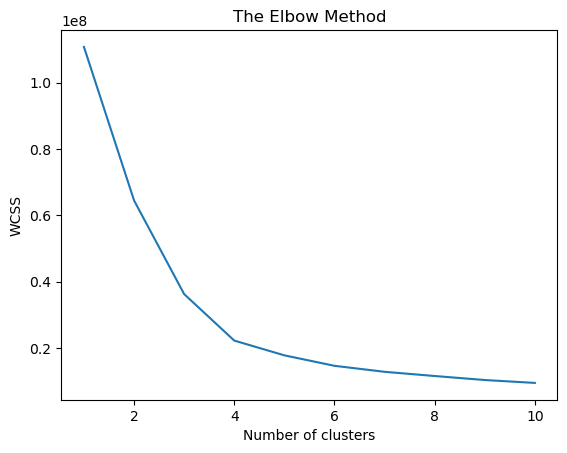

In [168]:
elbow_plot(new_df2)

In [169]:
kmeans = KMeans(n_clusters =3)

In [182]:
x = new_df2.iloc[:,0:26].values

In [183]:
new_df2.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other',
       'new_class'],
      dtype='object')

In [184]:
x

array([[42.,  0.,  0., ...,  0.,  0.,  0.],
       [24.,  0.,  0., ...,  0.,  0.,  1.],
       [47.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [42.,  1.,  0., ...,  0.,  0.,  1.],
       [47.,  0.,  0., ...,  0.,  0.,  1.],
       [47.,  0.,  0., ...,  0.,  0.,  1.]])

In [185]:
y = new_df2.iloc[:,26:27].values

In [186]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [3.],
       [3.],
       [3.]])

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [190]:
y_train

array([[2.],
       [2.],
       [3.],
       ...,
       [2.],
       [3.],
       [1.]])

In [191]:
kmeans.fit(x_train,y_train)

KMeans(n_clusters=3)

In [192]:
y_pred = kmeans.predict(x_test)

In [197]:
accuracy_score(y_test,y_pred)

0.23527721918988798

In [198]:
rf = RandomForestClassifier()


In [199]:
rf.fit(x_train,y_train)

C:\Users\LENOVO THINK PAD\AppData\Local\Temp\ipykernel_1940\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [201]:
y_pred = rf.predict(x_test)

In [202]:
accuracy_score(y_test,y_pred)

0.9956908934214306

In [203]:
import xgboost as xgb


In [204]:
xgb_model = xgb.XGBClassifier()


In [205]:
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [206]:
y_pred = xgb_model.predict(x_test)

In [207]:
accuracy_score(y_test,y_pred)

0.9962654409652398

In [210]:

import pickle

pickle.dump(xgb_model,open("Thyroid_model.pkl","wb"))